This guide trains a neural network model to classify images of clothing, like sneakers and shirts. 
This guide uses the Fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).
We will use 60,000 images to train the network and 10,000 images to evaluate how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow, just import and load the data:

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.14.0


In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [19]:
print(train_labels)

[9 0 0 ... 3 0 5]


#### 10 unique labels
0: T-shirt/top<br/>
1: Trouser<br/>
2: Pullover<br/>
3: Dress<br/>
4: Coat<br/>
5: Sandal<br/>
6: Shirt<br/>
7: Sneaker<br/>
8: Bag<br/>
9: Ankle boot

In [20]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
# Explore the data
print(train_images.shape) # 60,000 images, each represented by 28x28 pixels
print(train_labels.shape)
print(test_images.shape) # 10,000 images

(60000, 28, 28)
(60000,)
(10000, 28, 28)


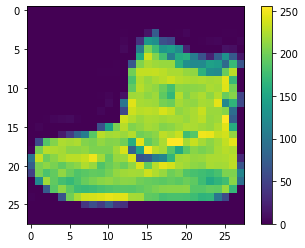

In [24]:
# Preprocess the data
# inspect the first image in the training set, see that pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
# Scale these values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

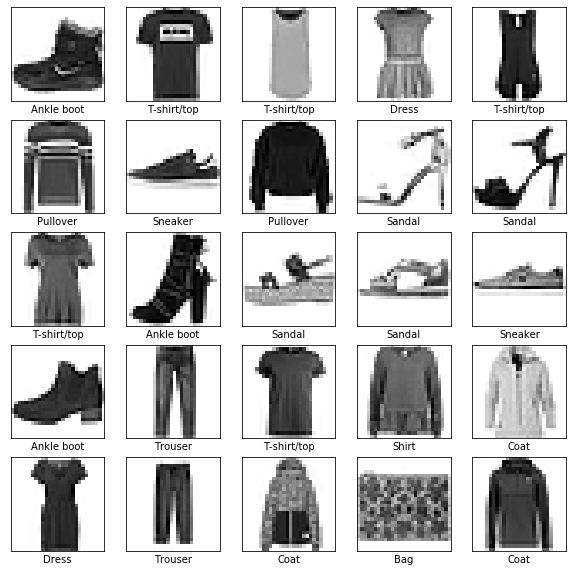

In [27]:
# Display first 25 images from the training set with class names
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [161]:
# Build the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10, activation=tf.nn.softmax))

The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are densely-connected, or fully-connected, neural layers. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

In [162]:
print(train_labels.shape)
train_images.shape

(60000,)


(60000, 28, 28)

In [163]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [165]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.2993 - acc: 0.8899
Epoch 2/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2843 - acc: 0.8941
Epoch 3/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2729 - acc: 0.8986
Epoch 4/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2616 - acc: 0.9030
Epoch 5/5
60000/60000 [==============================] - 4s 60us/sample - loss: 0.2502 - acc: 0.9069


In [166]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy: ', test_acc)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3586 - acc: 0.8739
Test accuracy:  0.8739


In [51]:
# Make predictions
preds = model.predict(test_images)
preds[0]

array([5.5949636e-07, 1.3574488e-07, 5.1508305e-08, 6.4492376e-08,
       2.1842876e-08, 2.2429714e-03, 2.2708635e-07, 2.2968259e-02,
       1.8749603e-06, 9.7478580e-01], dtype=float32)

A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. We can see which label has the highest confidence value:

In [53]:
np.argmax(preds[0])

9

In [54]:
# Model is most confident that this image is an ancle boot
# Checking test label to see if correct:
test_labels[0]

9

In [55]:
# Graph predictions
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
    color = 'blue'
    else:
    color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

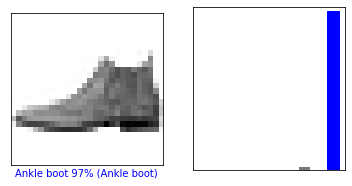

In [79]:
# Lets look at the 0th image, prediction, and prediction array 
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds,  test_labels)
plt.show()

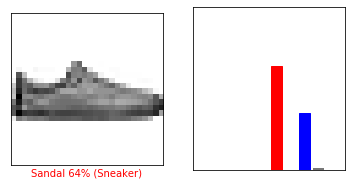

In [94]:
# Lets look at the 12th image, prediction, and prediction array 
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds,  test_labels)
plt.show()

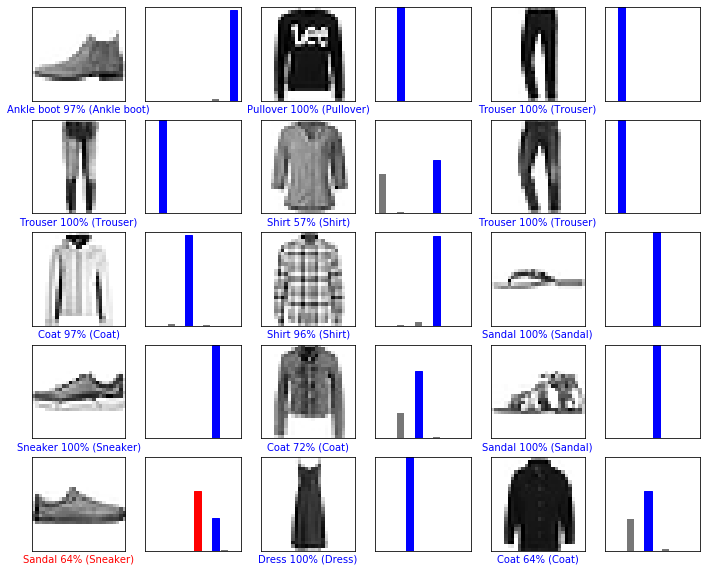

In [61]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, preds, test_labels)
plt.show()

In [63]:
# Try out model on single picture
img = test_images[0]
print(img.shape)

# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# So even though we're using a single image, we need to add it to a list:
img = (np.expand_dims(img, 0)) # Add to batch where it is the only member
print(img.shape)

(28, 28)
(1, 28, 28)


In [64]:
# Predict image
pred = model.predict(img)
print(pred)

[[5.5949425e-07 1.3574490e-07 5.1508312e-08 6.4492134e-08 2.1842880e-08
  2.2429687e-03 2.2708637e-07 2.2968244e-02 1.8749570e-06 9.7478592e-01]]


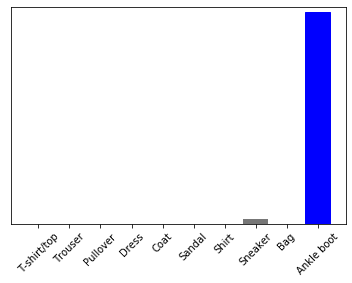

In [65]:
plot_value_array(0, pred, test_labels)
plt.xticks(range(10), class_names, rotation=45)
plt.show()

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [67]:
predResult = np.argmax(pred[0])
print(predResult)

9


In [102]:
# Check out the ones it got wrong
wrongs = []
for i in range(len(preds)):
    if np.argmax(preds[i]) != test_labels[i]:
        wrongs.append(i)
        
len(wrongs)

1292

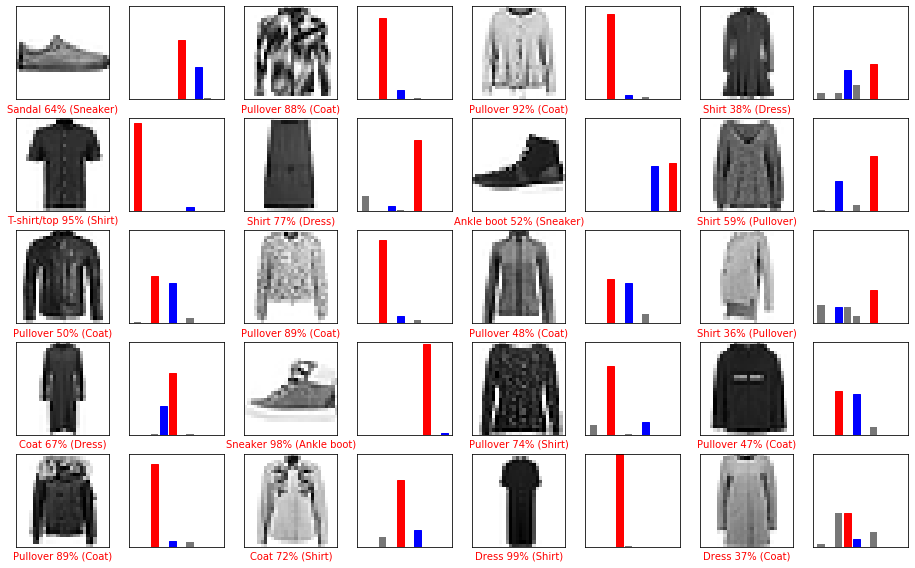

In [171]:
# Check out n first wrongs

n = 20
num_rows = n//4 + 1
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
i = 0
for nr in wrongs[0:n]:
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(nr, preds, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(nr, preds, test_labels)
    i += 1
plt.show()